In [1]:
import numpy as np
from numpy import arange, array
import pandas as pd
import seaborn as sb
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy import stats
# import shapefile
import lightgbm as lgb
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.pyplot import get_cmap
import seaborn as sns

In [ ]:
# df = pd.read_csv('C://Users//anyut//Desktop//Тест//us events ad_revenue filtered 03.02-07.02.csv')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [3]:
!cp /content/gdrive/'MyDrive'/us_events_ad_revenue_filtered_03.02-07.02.csv .

In [4]:
df = pd.read_csv('us_events_ad_revenue_filtered_03.02-07.02.csv')

In [ ]:
df

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:29:27,1643866167,2022-02-03 08:29:37,1643866177,wifi,Verizon,US,Elmira
860075,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:12:51,1643843571,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860076,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:06,1643843586,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860077,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:17,1643843597,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill


In [5]:
df = df.replace(r"[\"]", '')

In [ ]:
df

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:29:27,1643866167,2022-02-03 08:29:37,1643866177,wifi,Verizon,US,Elmira
860075,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:12:51,1643843571,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860076,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:06,1643843586,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860077,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:17,1643843597,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill


In [ ]:
df.dtypes

profile_id                 object
os_version                 object
device_manufacturer        object
device_model               object
device_type                object
device_locale              object
event_name                 object
event_json                 object
event_datetime             object
event_timestamp             int64
event_receive_datetime     object
event_receive_timestamp     int64
connection_type            object
operator_name              object
country_iso_code           object
city                       object
dtype: object

In [ ]:
df['event_json'][0]

'{"ad_type":"banner","placement":"","view_index":1,"session_view_index":0,"cur_ticks":637795729492245130,"session_length":705.8807,"revenue":0.000510313,"ads_ltv":0.487876676518837,"ecpm_sma":0.511508107185364,"normalized_ecpm_sma":0.511508107185364,"value":0.000510313,"currency":"USD","ad_country_code":"US","network_name":"Google AdMob","ad_unit_id":"64c6b1114ea8c1cc","ad_network_placement":"ca-app-pub-7511632782617496/8825263691","creativeId":"CJ3XirfD5vUCFYPnKAUdG3MOYQ"}'

In [6]:
df['event_json'].str.split(',')[0]

['{"ad_type":"banner"',
 '"placement":""',
 '"view_index":1',
 '"session_view_index":0',
 '"cur_ticks":637795729492245130',
 '"session_length":705.8807',
 '"revenue":0.000510313',
 '"ads_ltv":0.487876676518837',
 '"ecpm_sma":0.511508107185364',
 '"normalized_ecpm_sma":0.511508107185364',
 '"value":0.000510313',
 '"currency":"USD"',
 '"ad_country_code":"US"',
 '"network_name":"Google AdMob"',
 '"ad_unit_id":"64c6b1114ea8c1cc"',
 '"ad_network_placement":"ca-app-pub-7511632782617496/8825263691"',
 '"creativeId":"CJ3XirfD5vUCFYPnKAUdG3MOYQ"}']

In [7]:
new_df = df['event_json'].str.split(',', expand = True)

In [ ]:
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637795729492245130","""session_length"":705.8807","""revenue"":0.000510313","""ads_ltv"":0.487876676518837","""ecpm_sma"":0.511508107185364","""normalized_ecpm_sma"":0.511508107185364","""value"":0.000510313","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""Google AdMob""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CJ3XirfD5vUCFYPnKAUdG3MOYQ""}"
1,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637795729659949790","""session_length"":722.6512","""revenue"":0.000510313","""ads_ltv"":0.488386989518837","""ecpm_sma"":0.511388599872589","""normalized_ecpm_sma"":0.511388599872589","""value"":0.000510313","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""Google AdMob""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CNa-lL_D5vUCFZrpKAUdU2QBDQ""}"
2,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637796515863735930","""session_length"":431.8129","""revenue"":0.0023861625","""ads_ltv"":0.67847875732725","""ecpm_sma"":0.928597450256348","""normalized_ecpm_sma"":0.928597450256348","""value"":0.0023861625","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""APPLOVIN_EXCHANGE""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""banner_regular""","""creativeId"":""pandora-58""}"
3,"{""ad_type"":""int""","""placement"":""next_level""","""view_index"":1","""session_view_index"":1","""cur_ticks"":637797353426827330","""session_length"":125.9496","""revenue"":0.0138937835693359","""ads_ltv"":0.0138937835693359","""ecpm_sma"":13.7826328277588","""normalized_ecpm_sma"":13.8937835693359","""value"":0.0138937835693359","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""AppLovin""","""ad_unit_id"":""3ab7705b07ebb75f""","""ad_network_placement"":""inter_regular""","""creativeId"":""13045364""}"
4,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637797357392197840","""session_length"":12.71129","""revenue"":0.00682757","""ads_ltv"":0.0605709444258423","""ecpm_sma"":1.6602817773819","""normalized_ecpm_sma"":1.6602817773819","""value"":0.00682757","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""Google AdMob""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CMTi5e-h6_UCFUdVwQodt9EIMw""}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637794449687371810","""session_length"":474.1526","""revenue"":1.99722375E-05","""ads_ltv"":1.00750648684702","""ecpm_sma"":0.0809136256575584","""normalized_ecpm_sma"":0.0809136256575584","""value"":1.99722375E-05","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""APPLOVIN_EXCHANGE""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""banner_regular""","""creativeId"":""165277""}"
860075,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637794223717667630","""session_length"":10.89967","""revenue"":0.006740355","""ads_ltv"":0.277540839","""ecpm_sma"":3.37985777854919","""normalized_ecpm_sma"":3.37985777854919","""value"":0.006740355","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""Google AdMob""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CMeYrb2S4vUCFZWVyAodrPYHvA""}"
860076,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index

In [8]:
df = df.drop(['event_json'], axis = 1)

In [9]:
new_df.columns = ['ad_type', 'placement', 'view_index', 'session_view_index', 'cur_ticks', 'session_length', 'revenue', 'ads_ltv', 'ecpm_sma', 'normalized_ecpm_sma', 'value', 'currency', 'ad_country_code', 'network_name', 'ad_unit_id', 'ad_network_placement', '']

In [ ]:
new_df

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,
0,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637795729492245130","""session_length"":705.8807","""revenue"":0.000510313","""ads_ltv"":0.487876676518837","""ecpm_sma"":0.511508107185364","""normalized_ecpm_sma"":0.511508107185364","""value"":0.000510313","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""Google AdMob""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CJ3XirfD5vUCFYPnKAUdG3MOYQ""}"
1,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637795729659949790","""session_length"":722.6512","""revenue"":0.000510313","""ads_ltv"":0.488386989518837","""ecpm_sma"":0.511388599872589","""normalized_ecpm_sma"":0.511388599872589","""value"":0.000510313","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""Google AdMob""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CNa-lL_D5vUCFZrpKAUdU2QBDQ""}"
2,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637796515863735930","""session_length"":431.8129","""revenue"":0.0023861625","""ads_ltv"":0.67847875732725","""ecpm_sma"":0.928597450256348","""normalized_ecpm_sma"":0.928597450256348","""value"":0.0023861625","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""APPLOVIN_EXCHANGE""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""banner_regular""","""creativeId"":""pandora-58""}"
3,"{""ad_type"":""int""","""placement"":""next_level""","""view_index"":1","""session_view_index"":1","""cur_ticks"":637797353426827330","""session_length"":125.9496","""revenue"":0.0138937835693359","""ads_ltv"":0.0138937835693359","""ecpm_sma"":13.7826328277588","""normalized_ecpm_sma"":13.8937835693359","""value"":0.0138937835693359","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""AppLovin""","""ad_unit_id"":""3ab7705b07ebb75f""","""ad_network_placement"":""inter_regular""","""creativeId"":""13045364""}"
4,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637797357392197840","""session_length"":12.71129","""revenue"":0.00682757","""ads_ltv"":0.0605709444258423","""ecpm_sma"":1.6602817773819","""normalized_ecpm_sma"":1.6602817773819","""value"":0.00682757","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""Google AdMob""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CMTi5e-h6_UCFUdVwQodt9EIMw""}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637794449687371810","""session_length"":474.1526","""revenue"":1.99722375E-05","""ads_ltv"":1.00750648684702","""ecpm_sma"":0.0809136256575584","""normalized_ecpm_sma"":0.0809136256575584","""value"":1.99722375E-05","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""APPLOVIN_EXCHANGE""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""banner_regular""","""creativeId"":""165277""}"
860075,"{""ad_type"":""banner""","""placement"":""""","""view_index"":1","""session_view_index"":0","""cur_ticks"":637794223717667630","""session_length"":10.89967","""revenue"":0.006740355","""ads_ltv"":0.277540839","""ecpm_sma"":3.37985777854919","""normalized_ecpm_sma"":3.37985777854919","""value"":0.006740355","""currency"":""USD""","""ad_country_code"":""US""","""network_name"":""Google AdMob""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116

In [ ]:
new_df['placement'].unique()

array(['"placement":""', '"placement":"next_level"',
       '"placement":"replay"', '"placement":"lose_offer_attempt"',
       '"placement":"game_repeating_reward"',
       '"placement":"double_coins"',
       '"placement":"game_repeating_reward_int"',
       '"placement":"lose_offer_attempt_int"',
       '"placement":"double_coins_int"'], dtype=object)

In [10]:
new_df_placement = new_df['placement'].str.split(':', expand = True)
new_df_placement = new_df_placement.drop([0], axis = 1)
new_df_placement.columns = ['placement']
new_df_placement['placement'] = new_df_placement['placement'].str.replace(r"[\"]", '')
new_df_placement

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,placement
0,
1,
2,
3,next_level
4,
...,...
860074,
860075,
860076,
860077,


In [11]:
new_df_network = new_df['network_name'].str.split(':', expand = True)
new_df_network = new_df_network.drop([0], axis = 1)
new_df_network.columns = ['network_name_1']
new_df_network['network_name_1'] = new_df_network['network_name_1'].str.replace(r"[\"]", '')
new_df_network

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,network_name_1
0,Google AdMob
1,Google AdMob
2,APPLOVIN_EXCHANGE
3,AppLovin
4,Google AdMob
...,...
860074,APPLOVIN_EXCHANGE
860075,Google AdMob
860076,Google AdMob
860077,Google AdMob


In [12]:
new_df_normalized_ecpm_sma = new_df['normalized_ecpm_sma'].str.split(':', expand = True)
new_df_normalized_ecpm_sma = new_df_normalized_ecpm_sma.drop([0], axis = 1)
new_df_normalized_ecpm_sma.columns = ['normalized_ecpm_sma']
new_df_normalized_ecpm_sma = new_df_normalized_ecpm_sma.astype(str).astype(float)
new_df_normalized_ecpm_sma

,normalized_ecpm_sma
0,0.511508
1,0.511389
2,0.928597
3,13.893784
4,1.660282
...,...
860074,0.080914
860075,3.379858
860076,3.319878
860077,3.265896


In [13]:
new_df_ecpm_sma = new_df['ecpm_sma'].str.split(':', expand = True)
new_df_ecpm_sma = new_df_ecpm_sma.drop([0], axis = 1)
new_df_ecpm_sma.columns = ['ecpm_sma']
new_df_ecpm_sma = new_df_ecpm_sma.astype(str).astype(float)
new_df_ecpm_sma

,ecpm_sma
0,0.511508
1,0.511389
2,0.928597
3,13.782633
4,1.660282
...,...
860074,0.080914
860075,3.379858
860076,3.319878
860077,3.265896


In [14]:
new_df_value = new_df['value'].str.split(':', expand = True)
new_df_value = new_df_value.drop([0], axis = 1)
new_df_value.columns = ['value']
new_df_value = new_df_value.astype(str).astype(float)
new_df_value

,value
0,0.000510
1,0.000510
2,0.002386
3,0.013894
4,0.006828
...,...
860074,0.000020
860075,0.006740
860076,0.002780
860077,0.002780


In [15]:
new_df_revenue = new_df['revenue'].str.split(':', expand = True)
new_df_revenue = new_df_revenue.drop([0], axis = 1)
new_df_revenue.columns = ['revenue']
new_df_revenue = new_df_revenue.astype(str).astype(float)
new_df_revenue

,revenue
0,0.000510
1,0.000510
2,0.002386
3,0.013894
4,0.006828
...,...
860074,0.000020
860075,0.006740
860076,0.002780
860077,0.002780


In [16]:
new_df = new_df.drop(['placement', 'network_name', 'normalized_ecpm_sma', 'ecpm_sma', 'value', 'revenue'], axis = 1)

In [17]:
final_df = pd.concat([df, new_df, new_df_placement, new_df_network, new_df_normalized_ecpm_sma, new_df_ecpm_sma, new_df_value, new_df_revenue],axis=1)
final_df

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,ad_country_code,ad_unit_id,ad_network_placement,,placement,network_name_1,normalized_ecpm_sma,ecpm_sma,value,revenue
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,...,"""ad_country_code"":""US""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CJ3XirfD5vUCFYPnKAUdG3MOYQ""}",,Google AdMob,0.511508,0.511508,0.000510,0.000510
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,...,"""ad_country_code"":""US""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CNa-lL_D5vUCFZrpKAUdU2QBDQ""}",,Google AdMob,0.511389,0.511389,0.000510,0.000510
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,...,"""ad_country_code"":""US""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""banner_regular""","""creativeId"":""pandora-58""}",,APPLOVIN_EXCHANGE,0.928597,0.928597,0.002386,0.002386
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,...,"""ad_country_code"":""US""","""ad_unit_id"":""3ab7705b07ebb75f""","""ad_network_placement"":""inter_regular""","""creativeId"":""13045364""}",next_level,AppLovin,13.893784,13.782633,0.013894,0.013894
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,...,"""ad_country_code"":""US""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CMTi5e-h6_UCFUdVwQodt9EIMw""}",,Google AdMob,1.660282,1.660282,0.006828,0.006828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,2022-02-03 08:29:27,1643866167,2022-02-03 08:29:37,...,"""ad_country_code"":""US""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""banner_regular""","""creativeId"":""165277""}",,APPLOVIN_EXCHANGE,0.080914,0.080914,0.000020,0.000020
860075,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,2022-02-03 02:12:51,1643843571,2022-02-03 02:14:48,...,"""ad_country_code"":""US""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CMeYrb2S4vUCFZWVyAodrPYHvA""}",,Google AdMob,3.379858,3.379858,0.006740,0.006740
860076,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,2022-02-03 02:13:06,1643843586,2022-02-03 02:14:48,...,"""ad_country_code"":""US""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CNrdyMCS4vUCFRNXcgodTqsMOA""}",,Google AdMob,3.319878,3.319878,0.002780,0.002780
860077,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,2022-02-03 02:13:17,1643843597,2022-02-03 02:14:48,...,"""ad_country_code"":""US""","""ad_unit_id"":""64c6b1114ea8c1cc""","""ad_network_placement"":""ca-app-pub-75116327826...","""creativeId"":""CJnr0ciS4vUCFQ7HhwodgC8HVw""}",,Google AdMob,3.265896,3.265896,0.002780,0.002780


In [18]:
final_df['event_datetime'] = pd.to_datetime(final_df['event_datetime'])

In [19]:
final_df.dtypes

profile_id                         object
os_version                         object
device_manufacturer                object
device_model                       object
device_type                        object
device_locale                      object
event_name                         object
event_datetime             datetime64[ns]
event_timestamp                     int64
event_receive_datetime             object
event_receive_timestamp             int64
connection_type                    object
operator_name                      object
country_iso_code                   object
city                               object
ad_type                            object
view_index                         object
session_view_index                 object
cur_ticks                          object
session_length                     object
ads_ltv                            object
currency                           object
ad_country_code                    object
ad_unit_id                        

In [20]:
final_df.describe()

,event_timestamp,event_receive_timestamp,normalized_ecpm_sma,ecpm_sma,value,revenue
count,8.600790e+05,8.600790e+05,860079.000000,860079.000000,860079.000000,860079.000000
mean,1.644088e+09,1.644088e+09,3.227661,3.147110,0.002780,0.002780
std,1.058604e+05,1.055928e+05,16.433888,15.973978,0.015129,0.015129
min,1.643467e+09,1.643836e+09,0.001014,0.001014,0.000000,0.000000
25%,1.644017e+09,1.644018e+09,0.139942,0.139942,0.000046,0.000046
50%,1.644102e+09,1.644103e+09,0.480991,0.480991,0.000494,0.000494
75%,1.644177e+09,1.644177e+09,0.772006,0.772006,0.000533,0.000533
max,1.644268e+09,1.644268e+09,917.695618,908.876160,0.937196,0.937196


In [21]:
final_df['revenue']

0         0.000510
1         0.000510
2         0.002386
3         0.013894
4         0.006828
            ...   
860074    0.000020
860075    0.006740
860076    0.002780
860077    0.002780
860078    0.002780
Name: revenue, Length: 860079, dtype: float64

In [22]:
final_df['normalized_ecpm_sma'].min()

0.00101371412165463

In [23]:
final_df['normalized_ecpm_sma'].max()

917.695617675781

In [24]:
stat, p = shapiro(final_df['normalized_ecpm_sma']) # Тест Шапиро-Уилка
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Гауссовское распределение (fail to reject H0)')
else:
	print('Не Гауссовское распределение (reject H0)')

Statistics=0.169, p=0.000
Не Гауссовское распределение (reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
stat, p = normaltest(final_df['normalized_ecpm_sma']) # Тест д'Агостино на K ^ 2
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Гауссовское распределение (fail to reject H0)')
else:
	print('Не Гауссовское распределение (reject H0)')

Statistics=1528821.999, p=0.000
Не Гауссовское распределение (reject H0)


In [26]:
final_df['normalized_ecpm_sma'].std() # стандартное отклонение

16.43388820196357

In [27]:
mu_final_df = final_df['normalized_ecpm_sma'].mean() # оценка среднего  
mu_final_df

3.227660907982005

In [28]:
var_final_df = np.sum((final_df['normalized_ecpm_sma'] - mu_final_df) ** 2) / (len(final_df['normalized_ecpm_sma'] - 1)) # оценка дисперсии
var_final_df

270.0723674254461

In [29]:
sigma = var_final_df ** 0.5 # стандартное отклонение
sigma

16.43387864825118

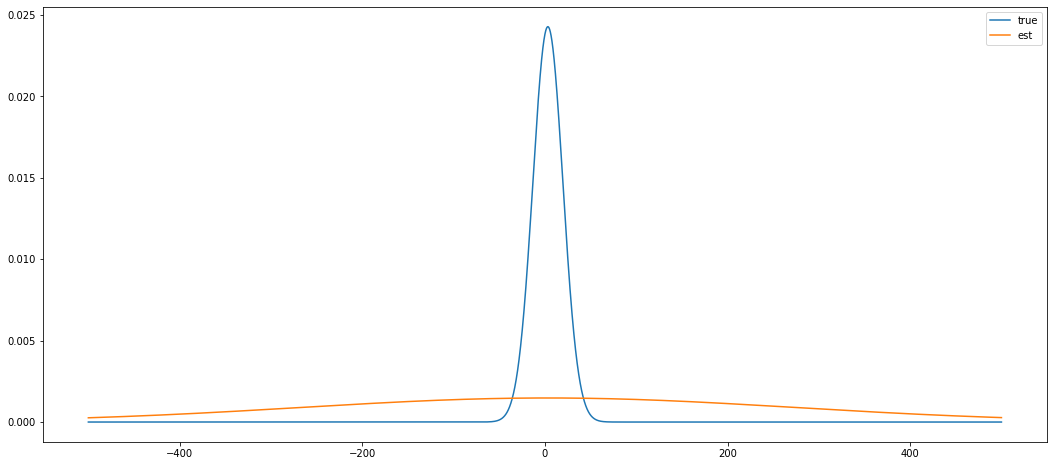

In [30]:
dens = stats.norm(mu_final_df, var_final_df)
true_dens = stats.norm(mu_final_df, sigma)

x = np.arange(-500, 500, 0.05)

plt.figure(figsize=(18, 8))
plt.plot(x, true_dens.pdf(x), label='true')
plt.plot(x, dens.pdf(x), label='est')
plt.legend()
plt.show()

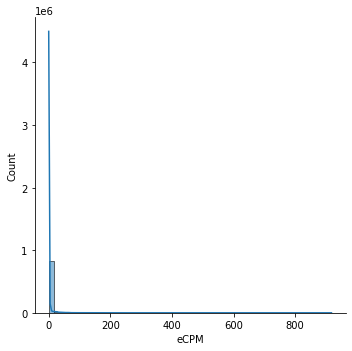

In [41]:
ax = sb.displot(final_df['normalized_ecpm_sma'], kde = True, bins = 50)
ax.set(xlabel = 'eCPM')
plt.show()

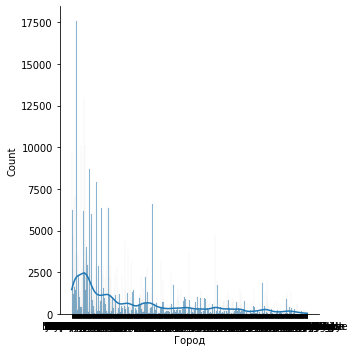

<Figure size 7200x1080 with 0 Axes>

In [32]:
ax = sb.displot(final_df['city'], kde = True, bins = 100)
ax.set(xlabel = 'Город')
plt.figure(figsize=(100, 15))
plt.show()

рапспределение похоже на логнормальное. модально eCPM не большой, но встречаются достаточно большие значения, что выглядит как выбросы

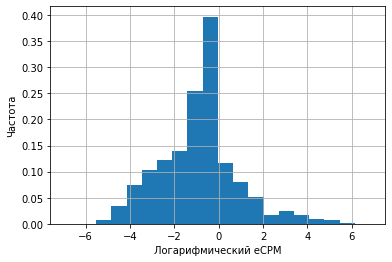

In [42]:
final_df['normalized_ecpm_sma'].apply(np.log).hist(bins=20, density = True)
plt.xlabel('Логарифмический eCPM')
plt.ylabel('Частота')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


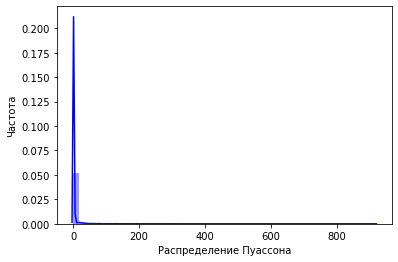

In [34]:

# import packages
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
# генерация данных Пуассона
poisson_data = final_df['normalized_ecpm_sma']

# формирование гистограммы
ax = sns.distplot(poisson_data,
                  kde = True,
                  color = 'blue')
ax.set(xlabel = 'Распределение Пуассона', ylabel = 'Частота')
 
plt.show()

Text(0.5, 0, 'Доход')

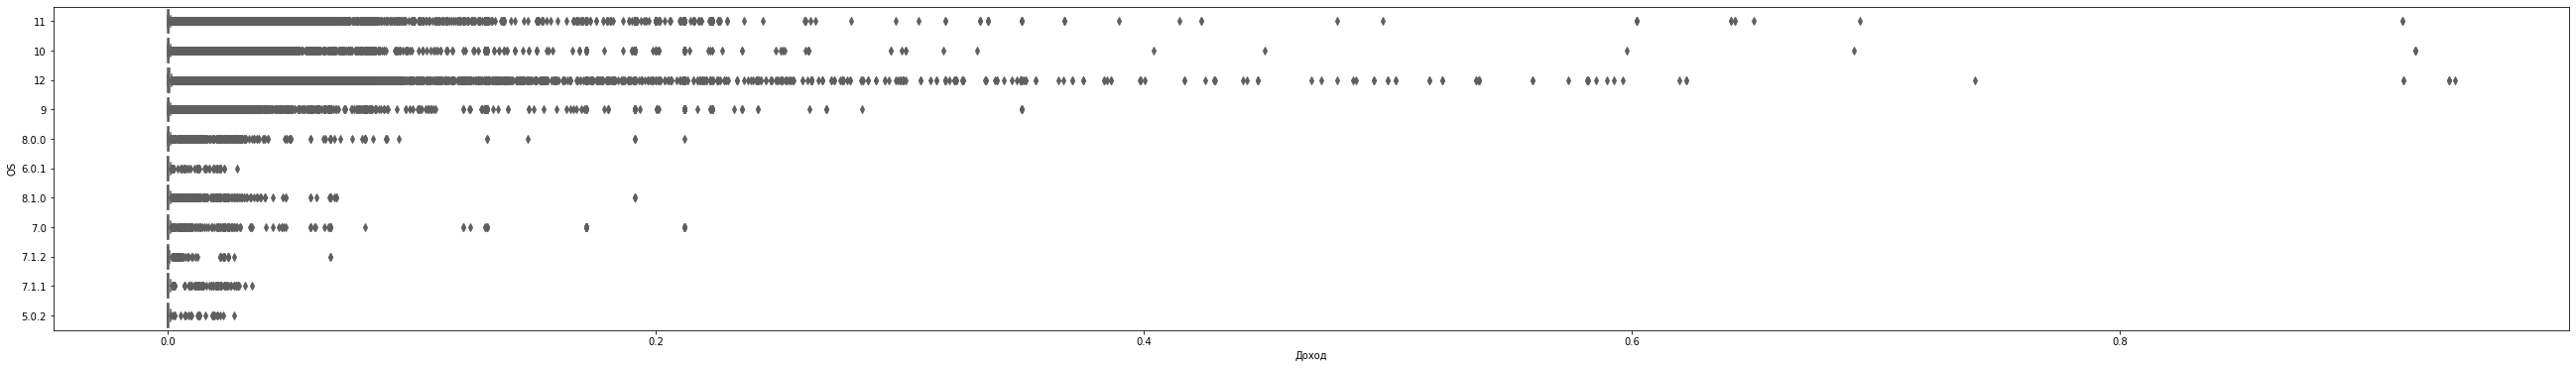

In [35]:
plt.figure(figsize=(100, 6))

plt.subplot(121)
sns.boxplot(x = 'value', y = 'os_version', data = final_df, palette = 'Set3')
plt.ylabel('OS')
plt.xlabel('Доход')

Text(0.5, 0, 'eCPM')

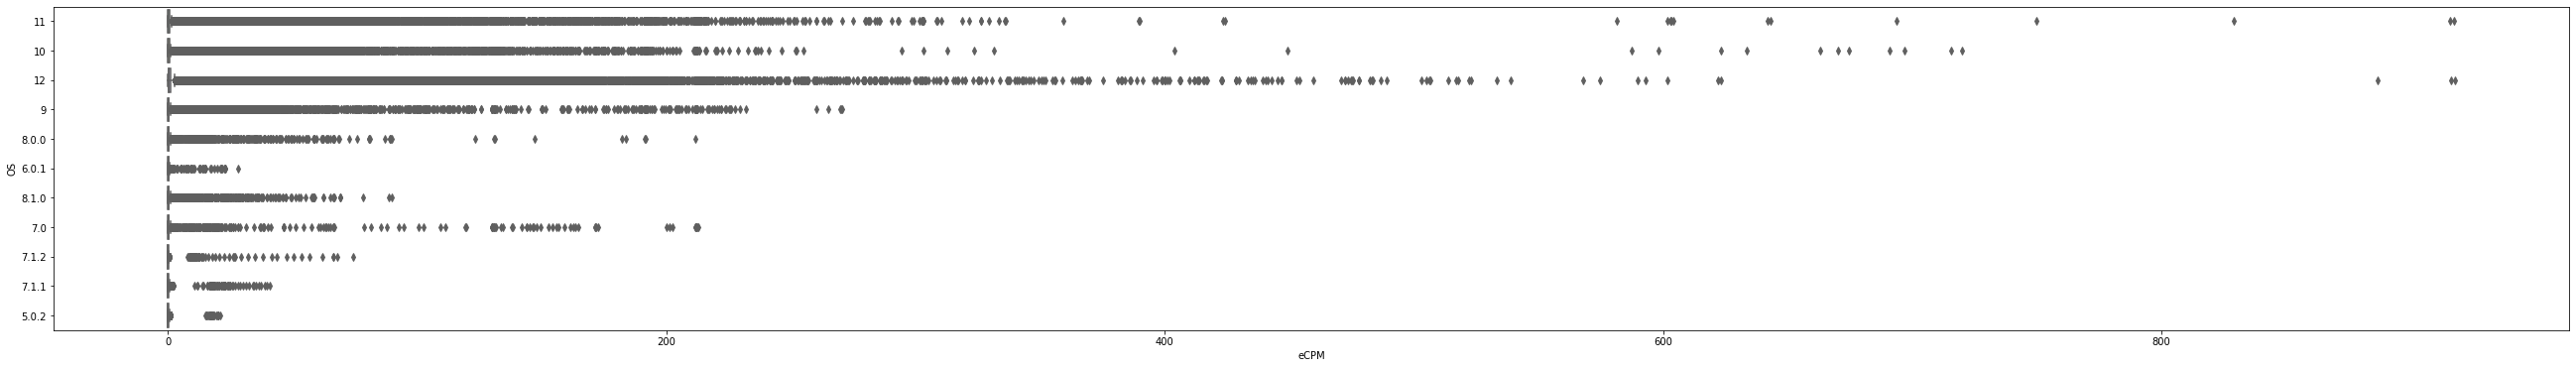

In [36]:
plt.figure(figsize=(100, 6))

plt.subplot(121)
sns.boxplot(x = 'normalized_ecpm_sma', y = 'os_version', data = final_df, palette = 'Set3')
plt.ylabel('OS')
plt.xlabel('eCPM')

In [50]:
df_mean_city = final_df.groupby('city')['normalized_ecpm_sma'].mean() # средний eCPM по городам
df_mean_city

city
Aberdeen       1.403133
Abilene       10.667823
Addison        0.489450
Afton          2.603684
Akron          9.055328
                ...    
Youngstown     4.455616
Ypsilanti      2.550220
Yukon          0.819556
Yuma           0.613265
Zanesville     1.859306
Name: normalized_ecpm_sma, Length: 920, dtype: float64

In [53]:
df_mean_os = final_df.groupby('os_version')['normalized_ecpm_sma'].mean() # средний eCPM по версиям ОС
df_mean_os

os_version
10       2.541132
11       3.320299
12       3.689530
5.0.2    0.822345
6.0.1    1.124704
7.0      3.148616
7.1.1    1.422382
7.1.2    0.946112
8.0.0    1.743820
8.1.0    1.136939
9        2.286346
Name: normalized_ecpm_sma, dtype: float64

In [59]:
df_sum_city = final_df.groupby('city')['revenue'].sum() # суммарный доход по городам
df_sum_city

city
Aberdeen      0.133882
Abilene       0.552695
Addison       0.000142
Afton         0.837622
Akron         3.468569
                ...   
Youngstown    1.140378
Ypsilanti     3.275320
Yukon         0.828062
Yuma          0.071711
Zanesville    1.612721
Name: revenue, Length: 920, dtype: float64

In [60]:
df_sum_os = final_df.groupby('os_version')['revenue'].sum() # суммарный доход по версиям ОС
df_sum_os

os_version
10        328.267931
11        587.224814
12       1305.578948
5.0.2       0.493530
6.0.1       0.783272
7.0        10.950994
7.1.1       1.624575
7.1.2       1.089698
8.0.0      11.892016
8.1.0       9.787017
9         133.105867
Name: revenue, dtype: float64